## Flags Machine Learning 
Machine Learning with Flags data set. 

+ Raul Eulogio
+ David A. Campos
+ Vincent La

## Abstract
For this quick project, I wanted to implement a few **Machine Learning** techniques on a data set containing descriptive attributes of certain countries' flags. We have a total of 129 flags from real countries throughout the globe and 28 different attributes. 

Many of these attributes are **Categorical**, meaning they can only hold certain values. An example is the color of a bicycle, say we had a data set with 5 instances of bicycles, for each record we decided to collect the color of these bicycles. We record these instances as {`red`, `blue`, `green`, `mixed`, `purple`}. Variables that are categorical we identify as having an identifiable set of attributes. Often times in machine learning certain methods perform better when using categorical variables.

Thus for this project I decided to use 4 statistical models which I thought would do significantly better than others. The ones I have chosen are listed here (although I will go into more detail about each model in later sections):

+ Kth Nearest Neighbor
+ Decision Trees
+ (Bagging) Random Forest
+ Neural Networks

I employ critical data analysis modules in this project more specifically 

+ pandas
+ scikit learn 
+ matplotlib (for visuals)

## 1. Load Modules
We load our modules into our python environment. In my case I am employing a **Jupyter Notebook** while running inside an **Anaconda** environment. 

For now to illustrate and show the module versions in a simple way I will name the ones I used and show the version I used as follows:

+ numpy==1.11.2
+ pandas==0.18.1
+ matplotlib==1.5.3
+ sklearn==0.18.1
+ seaborn==0.7.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Visuals 
import seaborn as sns # Enhanced Visuals
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer # Transform categorical variables
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier # Bagging Forest
from sklearn.neural_network import MLPClassifier # Neural Networks
from urllib.request import urlopen

pd.set_option('display.max_columns', 500) # Included to show all the columns since it is a fairly large data set
plt.style.use('ggplot') # Using ggplot2 style visuals because that's how I learned my visuals and I'm sticking to it!

## 2. Get Data
Data set from `UCI Database`. I decided to use this data set because it was a real world application of machine learning. Looking through the data set you can see certain attributes like colors present, number of stripes, presence of crosses. 

Our goal is to try to find the best method which will predict what **religion** the country based on certain physical characteristics. Before going into the analysis, you can make certain assumptions for example the presence of **Crosses** on the flag would be a strong indicator of religious presence in the country. 

Our goal is to make these assumption with strong statistical evidence to back our claims and see what attributes helped us the most. I could be wrong and it could be that **Crosses** was found **not** to be statistically significant. Thus with machine learning, and statistical learning (data science, data mining, classification etc) we are trying to find statistical patterns that would lead us to predict to help our understanding of the data around us. 

In [2]:
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

names = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 
         'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 
         'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 
         'icon', 'animate', 'text', 'topleft', 'botright']


flags = pd.read_csv(urlopen(UCI_data_URL), names = names)
flags.set_index(['name'], inplace = True)
flags.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [4]:
print("Here's the dimensions of our data set:")
print(flags.shape)
print("Here's the data types of our columns:")
print(flags.dtypes)

Here's the dimensions of our data set:
(194, 29)
Here's the data types of our columns:
landmass       int64
zone           int64
area           int64
population     int64
language       int64
religion       int64
bars           int64
stripes        int64
colours        int64
red            int64
green          int64
blue           int64
gold           int64
white          int64
black          int64
orange         int64
mainhue       object
circles        int64
crosses        int64
saltires       int64
quarters       int64
sunstars       int64
crescent       int64
triangle       int64
icon           int64
animate        int64
text           int64
topleft       object
botright      object
dtype: object


### Converting Data Types
Since we are dealing with a lot of `Categorical Variables` it is necessary to convert them as such, if we were to leave our data as is this would significantly change our models and interpretation of them. 

For this project I went ahead and converted many of these categorical variables to numerical representations. So using the same example as before: 

+ we would convert the set {`red`, `blue`, `green`, `mixed`, `purple`} to {0, 1, 2, 3, 4, 5}

First we employ a `for-loop` to convert the appropriate columns to categorical variables, since upon inspection the data types are for the most part `int64` (integers) and `object`. We must explicitly state the types since pandas can't interpret the data type when reading in a file. 

In [5]:
someArray = ['landmass', 'zone', 'language', 'religion', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
      'mainhue', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

for items in flags:
    if items in someArray:
        flags[items] = flags[items].astype('category')   

cat_columns = flags.select_dtypes(['category']).columns
flags[cat_columns] = flags[cat_columns].apply(lambda x: x.cat.codes)

for items in flags:
    if items in someArray:
        flags[items] = flags[items].astype('category')   

print("Here are the newly transformed variable data types:")
print(flags.dtypes)

Here are the newly transformed variable data types:
landmass      category
zone          category
area             int64
population       int64
language      category
religion      category
bars             int64
stripes          int64
colours          int64
red           category
green         category
blue          category
gold          category
white         category
black         category
orange        category
mainhue       category
circles          int64
crosses          int64
saltires         int64
quarters         int64
sunstars         int64
crescent      category
triangle      category
icon          category
animate       category
text          category
topleft       category
botright      category
dtype: object


Let's check to see if our data types are correct and then output the first 10 instances of our data set to make sure we converted the categorical data to their integer counterparts

In [6]:
flags.head(10)

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4,0,648,16,9,2,0,3,5,1,1,0,1,1,1,0,4,0,0,0,0,1,0,0,1,0,0,0,4
Albania,2,0,29,3,5,6,0,0,3,1,0,0,1,0,1,0,6,0,0,0,0,1,0,0,0,1,0,5,6
Algeria,3,0,2388,20,7,2,2,0,3,1,1,0,0,1,0,0,4,0,0,0,0,1,1,0,0,0,0,3,7
American-Samoa,5,2,0,0,0,1,0,0,5,1,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,6
Andorra,2,0,0,0,5,0,3,0,3,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,6
Angola,3,1,1247,7,9,5,0,2,3,1,0,0,1,0,1,0,6,0,0,0,0,1,0,0,1,0,0,5,0
Anguilla,0,3,0,0,0,1,0,1,3,0,0,1,0,1,0,1,7,0,0,0,0,0,0,0,0,1,0,6,1
Antigua-Barbuda,0,3,0,0,0,1,0,1,5,1,0,1,1,1,1,0,6,0,0,0,0,1,0,1,0,0,0,0,6
Argentina,1,2,2777,28,1,0,0,3,2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


## 3. Exploratoray Analysis
We can do some quick Exploratory analysis to give us a better picture of our data set. The first thing we should examine would be the column **religion**. So I decided to create a bar graph showing showing the different religions associated with the 129 countries.

In [7]:
religionNames = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']

for x in range(7):
   i = x
   x = flags.loc[:, 'religion'] == x
   print('The %s religion can be found in %d countries' % (religionNames[i], len(flags[x].index)))

The Catholic religion can be found in 40 countries
The Other Christian religion can be found in 60 countries
The Muslim religion can be found in 36 countries
The Buddhist religion can be found in 8 countries
The Hindu religion can be found in 4 countries
The Ethnic religion can be found in 27 countries
The Marxist religion can be found in 15 countries


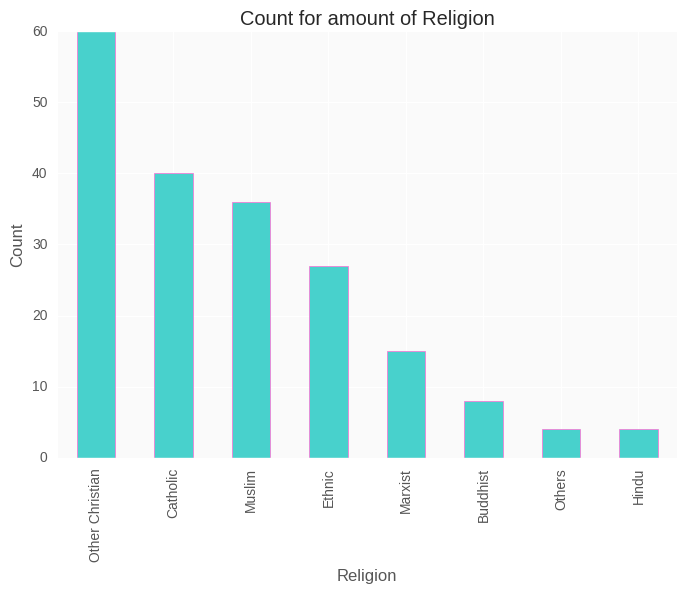

In [8]:
labels = ['Other Christian', 'Catholic', 'Muslim', 'Ethnic', 'Marxist', 'Buddhist', 'Others', 'Hindu']

ax = flags.religion.value_counts().plot(kind='bar', 
                                        color= ['#48D1CC'] ,edgecolor=['#FF6AD5'])
plt.title("Count for amount of Religion")
ax.set_axis_bgcolor('#fafafa') # Set the backgroudn to a different color
plt.xlabel("Religion")
plt.ylabel("Count")
ax.set_xticklabels(labels)
plt.show()

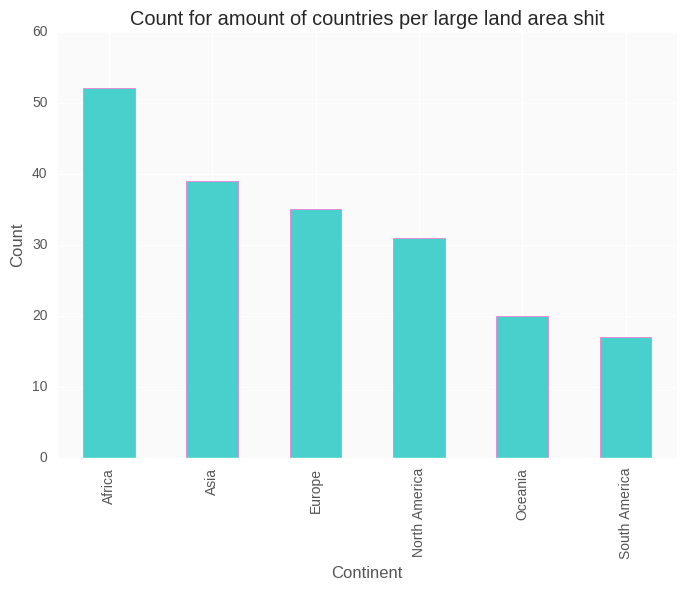

In [9]:
labels = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

ax = flags.landmass.value_counts().plot(kind='bar', 
                                        color= ['#48D1CC'] ,edgecolor=['#FF6AD5'])
plt.title("Count for amount of countries per large land area shit")
ax.set_axis_bgcolor('#fafafa') # Set the backgroudn to a different color
plt.xlabel("Continent")
plt.ylabel("Count")
ax.set_xticklabels(labels)
plt.show()

Here we create a scatter plot where we use `area` as the x-axis and `population` as our y-axis. I will develop this more for now I just wanted to get aquianted with scatter plots in **Python**

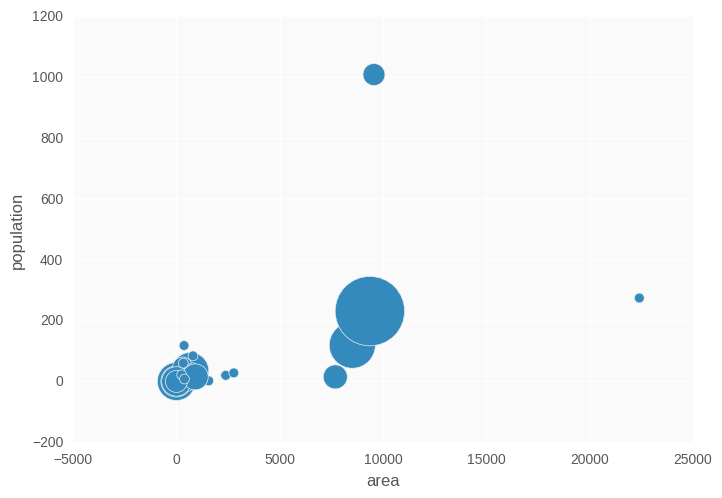

In [10]:
ax = flags.plot.scatter(x = 'area', y = 'population', s = flags['sunstars']*50)
ax.set_axis_bgcolor('#fafafa') # Set the backgroudn to a different color
plt.show()

## 4. Model Selection
First we create our **Training** and **Test Sets** and being with **Kth Nearest Neighbor**

In [11]:
train, test = train_test_split(flags, test_size = 0.20, random_state = 42)

train_set = train.ix[:, train.columns != 'religion']
class_set = train.ix[:, train.columns == 'religion']

test_set = test.ix[:, test.columns != 'religion']
test_class_set = test.ix[:, test.columns == 'religion']

In [12]:
kNN = KNeighborsClassifier()

kNN.fit(train_set, class_set['religion'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
predictionsTrain = kNN.predict(train_set)

print(pd.crosstab(predictionsTrain, class_set['religion']))

accuracyTrain = kNN.score(train_set, class_set['religion'])

print("Here is our accuracy for our training set:")
print(accuracyTrain)

religion   0   1   2  3  4   5  6  7
row_0                               
0         25   4   4  3  1   3  2  2
1          3  36   3  1  0   3  1  0
2          5   2  23  3  1   5  0  0
5          2   2   1  0  0  10  2  1
6          0   0   1  0  0   0  5  1
Here is our accuracy for our training set:
0.638709677419


One important thing to notice is that the model failed to consider `religion 7` ('Others') because there was a total of 4 instances of this type of religion (shown below). So right off the bat we can tell this model will suffer from predicting accurately because of this. 

Which will be indicative that this model is **not** the best to use in our analysis. I often use **Kth Nearest Neighbor** as a starting point when doing **machine learning** then build from there.

In [14]:
# Here we output the number of instances we had 'Others' which is very small 
seven = class_set[class_set['religion'] == 7]
seven

,religion
name,
Japan,7
South-Korea,7
Israel,7
Togo,7


In [15]:
print("The train error rate for our model is:")
train_error_rate = 1 - accuracyTrain  
print('%.5f' % train_error_rate)

The train error rate for our model is:
0.36129


## Test Errror Rate
Siginificantly more important than our **Training Error Rate** our **Test Error Rate** gives us a better criteria as to how our model does. Simply because it uses data it hasn't seen yet, since our **Training Set** might perform well due to **Over-fitting**.

In [16]:
predictions = kNN.predict(test_set)

accuracy = kNN.score(test_set, test_class_set['religion'])

print("Here is our accuracy for our training set:")
print('%.3f' % accuracy)

Here is our accuracy for our training set:
0.333


In [17]:
print("Table comparing actual vs. predicted values for our test set:")
print(pd.crosstab(predictions, test_class_set['religion']))

Table comparing actual vs. predicted values for our test set:
religion  0  1  2  3  4  5  6  7
row_0                           
0         2  4  0  0  1  1  1  0
1         0  7  0  1  0  0  1  0
2         2  3  1  0  1  3  1  0
5         1  1  3  0  0  2  1  0
6         0  1  0  0  0  0  1  0


In [18]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate = 1 - accuracy
print('%.2f' % test_error_rate)

The test error rate for our model is:
0.67


Performed very poorly, which was expected. I always start with a simple algorithm (although sometimes it might perform better than more complicated models), then evolve to more complicated models and use the simpler model as a justification to use other models. Let's move on to decision trees!

## Decision Trees

In [19]:
dt = DecisionTreeClassifier(random_state = 42)
fit = dt.fit(train_set, class_set)

In [20]:
fit

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

Let's plot the decision tree. So the work around was create a `dot` file then convert using an online graphviz to `png` because fuck downloading that shit. (source: https://github.com/dreampuf/GraphvizOnline)

In [24]:
with open('flags.dot', 'w') as f:
    f = export_graphviz(fit, out_file = f)

<img src='images/index.png'>

Next we measure the importance of the feature (variable) using a for loop inspired by: (http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

Here the higher the value the more importance the variable had when creating our model. So we can see that **Language** and **Landmass** had the most influence on our model. Which is something that is intuitive. Explain more here later...

In [27]:
importances = fit.feature_importances_
indices = np.argsort(importances)[::-1]

# Remove 'name' and 'religion' since we used it as the index for our data set
namesInd = names[1:]
# NEED TO FIND MORE EFFICIENT WAY OF DELETING THESE TWO VARIABLES FROM THE LIST
del namesInd[5]
print(namesInd)

# Print the feature ranking
print("Feature ranking:")

for f in range(28):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, namesInd[indices[i]], importances[indices[f]]))

['landmass', 'zone', 'area', 'population', 'language', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
Feature ranking:
1. The feature 'language' has a Gini Importance of 0.256386
2. The feature 'landmass' has a Gini Importance of 0.200495
3. The feature 'mainhue' has a Gini Importance of 0.081864
4. The feature 'zone' has a Gini Importance of 0.059129
5. The feature 'population' has a Gini Importance of 0.054110
6. The feature 'circles' has a Gini Importance of 0.040292
7. The feature 'topleft' has a Gini Importance of 0.032241
8. The feature 'bars' has a Gini Importance of 0.028925
9. The feature 'blue' has a Gini Importance of 0.027789
10. The feature 'black' has a Gini Importance of 0.027495
11. The feature 'gold' has a Gini Importance of 0.027066
12. The feature 'area' has a Gini Importance of 0.026

Did another for loop to make sure they were the same!

In [28]:
for f in range(28):
    print(namesInd[indices[f]])

language
landmass
mainhue
zone
population
circles
topleft
bars
blue
black
gold
area
stripes
crosses
triangle
red
animate
text
white
orange
quarters
botright
crescent
green
saltires
colours
sunstars
icon


In [22]:
accuracy_dt = fit.score(test_set, test_class_set['religion'])

print("Here is our mean accuracy on the test set:")
print('%.2f' % accuracy_dt)

Here is our mean accuracy on the test set:
0.51


In [21]:
predictions_dt = fit.predict(test_set)

print("Table comparing actual vs. predicted values for our test set:")
print(pd.crosstab(predictions_dt, test_class_set['religion']))

Table comparing actual vs. predicted values for our test set:
religion  0   1  2  3  4  5  6  7
row_0                            
0         4   1  1  0  0  0  1  0
1         1  11  1  0  1  3  0  0
2         0   1  0  0  0  2  0  0
5         0   3  2  0  1  1  0  0
6         0   0  0  1  0  0  4  0


In [23]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate_dt = 1 - accuracy_dt
print('%.2f' % test_error_rate_dt)

The test error rate for our model is:
0.49


Here we can see our **Decision Trees** did significantly better than our **KNN** model! It seems that the `Other religion` still isn't captured by our model which explains our rather still high **Test Error Rate**. So next is **Random Forest**...

## To Be Continued...